# Importações 


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



# Configuções Iniciais


In [21]:
plt.style.use('default')

# Caminhos relativos para os dados na mesma pasta que o notebook

In [22]:
data_paths = {
    'BTC': 'moedas/coin_Bitcoin.csv',
    'ETH': 'moedas/coin_Ethereum.csv',
    'XRP': 'moedas/coin_XRP.csv',
    'LTC': 'moedas/coin_Litecoin.csv',
    'ADA': 'moedas/coin_Cardano.csv',
    'DOT': 'moedas/coin_Polkadot.csv',
    'XLM': 'moedas/coin_Stellar.csv',
    'LINK': 'moedas/coin_Chainlink.csv',
    'DOGE': 'moedas/coin_Dogecoin.csv',
    'BNB': 'moedas/coin_BinanceCoin.csv'
}



# Carregar os dados

In [23]:
dfs = {}
for key, path in data_paths.items():
    try:
        df = pd.read_csv(path)
        if 'Close' in df.columns:
            dfs[key] = df
        else:
            print(f"A coluna 'Close' não está presente em {key}.")
    except FileNotFoundError:
        print(f"Arquivo não encontrado: {path}")
    except pd.errors.EmptyDataError:
        print(f"Arquivo vazio: {path}")
    except Exception as e:
        print(f"Erro ao ler {path}: {e}")

# Verificar se os dados foram carregados corretamente

In [24]:
for key, df in dfs.items():
    print(f"{key} dataframe shape: {df.shape}")
    print(df.head())

BTC dataframe shape: (2991, 10)
   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
ETH dataframe shape: (2160, 10)
   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.87981

# Função para limpar os dados

In [25]:
def clean_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df[['Close']]
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# Limpar todos os datasframes


In [26]:
for key in dfs:
    try:
        dfs[key] = clean_data(dfs[key])
        dfs[key].rename(columns={'Close': key}, inplace=True)
    except Exception as e:
        print(f"Erro ao limpar dados de {key}: {e}")

# Unir todos os dataframes em um só

In [27]:
crypto_df = pd.concat(dfs.values(), axis=1)

# Verificar os dados consolidados


In [28]:
print(crypto_df.head())

                            BTC  ETH  XRP      LTC  ADA  DOT  XLM  LINK  DOGE  \
Date                                                                            
2013-04-29 23:59:59  144.539993  NaN  NaN  4.38390  NaN  NaN  NaN   NaN   NaN   
2013-04-30 23:59:59  139.000000  NaN  NaN  4.29649  NaN  NaN  NaN   NaN   NaN   
2013-05-01 23:59:59  116.989998  NaN  NaN  3.80101  NaN  NaN  NaN   NaN   NaN   
2013-05-02 23:59:59  105.209999  NaN  NaN  3.37198  NaN  NaN  NaN   NaN   NaN   
2013-05-03 23:59:59   97.750000  NaN  NaN  3.04491  NaN  NaN  NaN   NaN   NaN   

                     BNB  
Date                      
2013-04-29 23:59:59  NaN  
2013-04-30 23:59:59  NaN  
2013-05-01 23:59:59  NaN  
2013-05-02 23:59:59  NaN  
2013-05-03 23:59:59  NaN  


# Análise Exploratória


 1. Tendências históricas


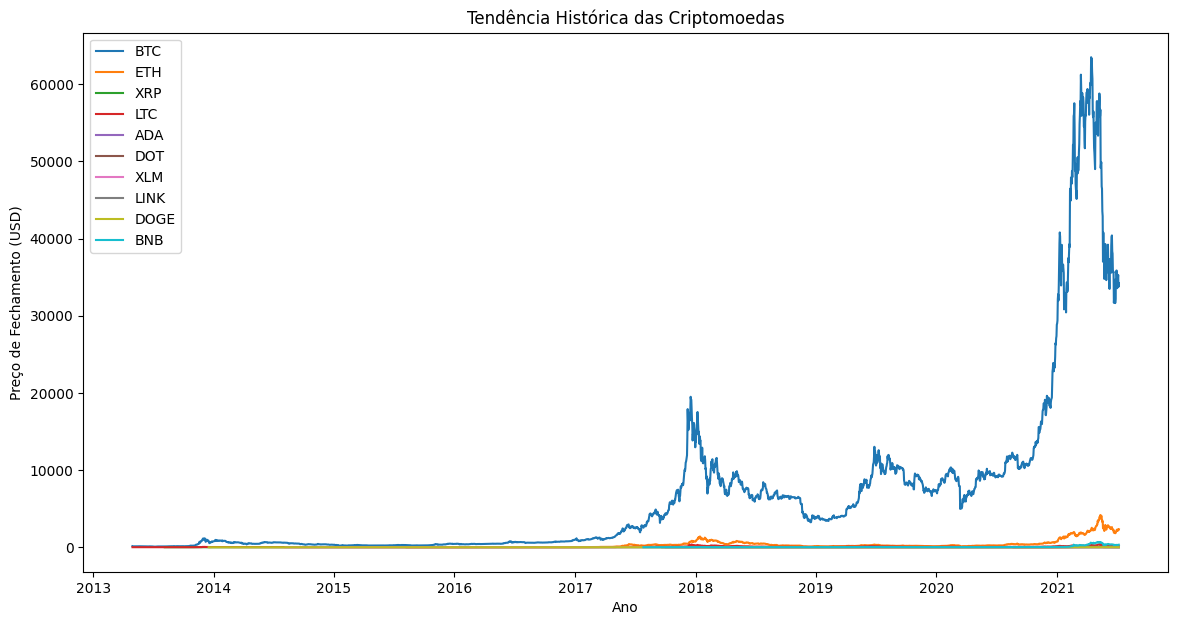

In [29]:
plt.figure(figsize=(14, 7))
for column in crypto_df.columns:
    if np.issubdtype(crypto_df[column].dtype, np.number):
        plt.plot(crypto_df[column], label=column)
plt.legend()
plt.title('Tendência Histórica das Criptomoedas')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

2. Valores Médios

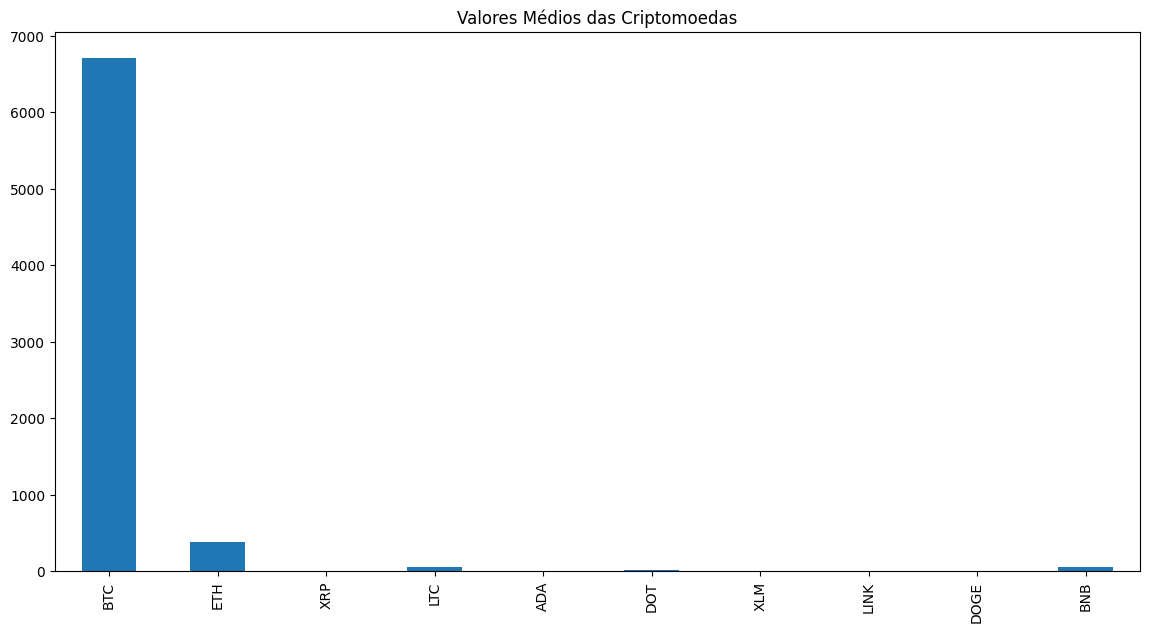

In [30]:
mean_values = crypto_df.mean()
plt.figure(figsize=(14, 7))
mean_values.plot(kind='bar')
plt.title('Valores Médios das Criptomoedas')
plt.show()

3. Variação Anual

C:\Users\3668822024.1\AppData\Local\Temp\ipykernel_4900\3597391578.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = crypto_df.resample('Y').ffill().pct_change() * 100


<Figure size 1400x700 with 0 Axes>

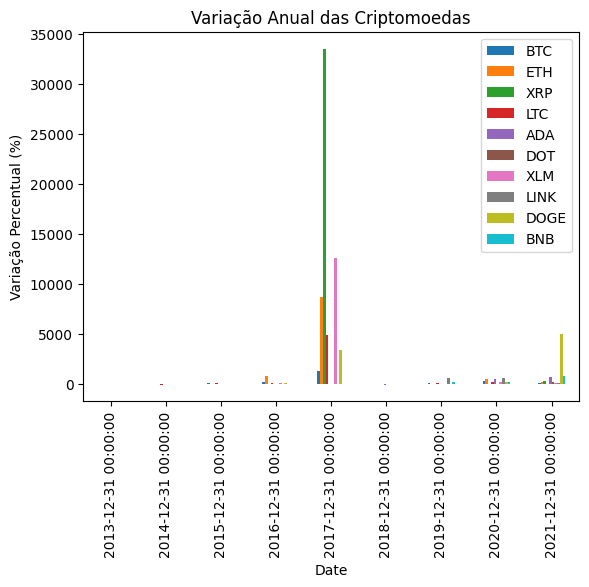

In [31]:
annual_returns = crypto_df.resample('Y').ffill().pct_change() * 100
plt.figure(figsize=(14, 7))
annual_returns.plot(kind='bar')
plt.title('Variação Anual das Criptomoedas')
plt.ylabel('Variação Percentual (%)')
plt.show()

4. Análise por dia da semana

<Figure size 1400x700 with 0 Axes>

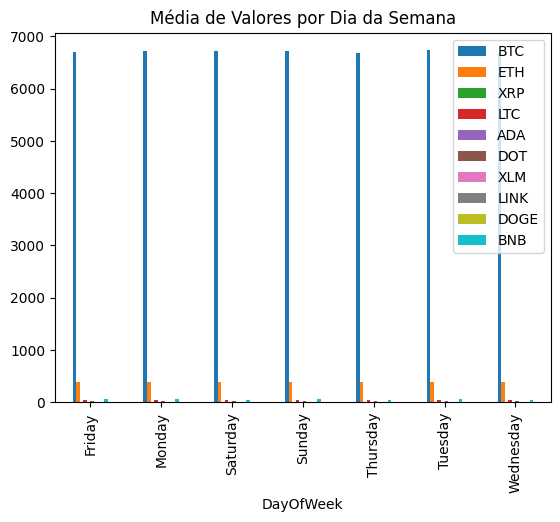

In [32]:
crypto_df['DayOfWeek'] = crypto_df.index.day_name()
mean_by_day = crypto_df.groupby('DayOfWeek').mean()
plt.figure(figsize=(14, 7))
mean_by_day.plot(kind='bar')
plt.title('Média de Valores por Dia da Semana')
plt.show()

5. Moeda mais interessante


6. Moeda menos interessante


7. Correlação entre os valores para todas as criptomoedas

 *** PERGUNTA EXTRA 1 *** 

*** PERGUNTA EXTRA 2 ***

# Importação para o Banco de Dados



* Conexão do banco de dados com a ferramenta de visualização de dados